# Lab 4 coding solutions

<a name="prob_a"></a>

##### problem coding A



As set up above, do_example.py
solves the damped, harmonic oscillator with the (unstable) forward Euler method.

1.  Write a new routine that solves the harmonic oscilator using [Heun’s method](#eq:heuns)
    along the lines of the routines in [lab4_functions.py](https://github.com/phaustin/numeric/blob/master/numlabs/lab4/lab4_functions.py)

    Hand in a fresh notebook with the code and a plot.


##### problem coding B

1.  Now solve the following test equation by both the midpoint and
    Heun’s method and compare. 
    
    $$f(y,t) = t - y  + 1.0$$ 
    
    Choose two sets
    of initial conditions and determine if 
    there is any difference between the two methods when applied to
    either problem. Should there be? Explain by analyzing the steps
    that each method is taking.
    
2. Add your answer as new cells to the problem A notebook



******************************
context imported. Front of path:
/Users/phil/repos/numeric/solutions
back of path: /Users/phil/.ipython
******************************

through /Users/phil/repos/numeric/solutions/lab4/context.py


Text(0, 0.5, 'y0')

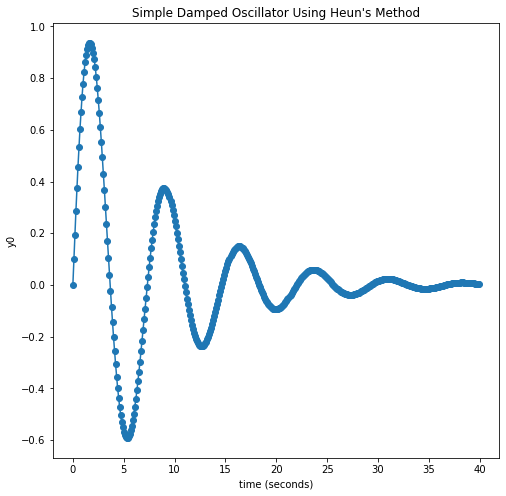

In [1]:
# Coding Problem A

import context
from numlabs.lab4.example.test import read_init,euler4
import numpy as np
from matplotlib import pyplot as plt
import json

%matplotlib inline

#
# specify the derivs function
#
def derivs(coeff, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivitive
  f[0]=y[1]
  f[1]= -1.*coeff.c1*y[1] - coeff.c2*y[0]
  return f

# define a function for Heun's method
def heun(coeff, y, derivs):
  k1 = coeff.dt * derivs(coeff,y)
  k2 = coeff.dt * derivs(coeff,y + (2.0/3.0 * k1))
  ynew = y + (1.0/4.0) * k1 + (3.0/4.0) * k2
  return ynew

#
# first make sure we have an input file in this directory
#
initialVals={'yinitial': [0.,1.],'t_beg':0.,'t_end':40.,'dt':0.1,'c1':1./4,'c2':3./4}
initialVals['comment'] = 'written Oct. 17, 2015'
initialVals['plot_title'] = 'Simple Damped Oscillator Using Heun\'s Method'

infile='run_1.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff
#
        
infile='run_1.json'
coeff=read_init(infile)

#
# integrate and save the result in savedata
#
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
y=coeff.yinitial
nsteps=len(time) 
savedata=np.empty([nsteps],np.float64)
for i in range(nsteps):
    if i == 0:
        savedata[i] = y[0] # input initial condition
    else:
        y=heun(coeff,y,derivs) # call heun at each timestep
        savedata[i]=y[0]

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
theAx.plot(time,savedata,'o-')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0')       

savedata_heun - savedata_midpoint:
[ 0.00000000e+00 -2.22044605e-16 -2.22044605e-16 -2.22044605e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.22044605e-16
 -4.44089210e-16 -4.44089210e-16]
Very little difference between Heun's method and Midpoint method
Plot shows exponential growth, similar to the curves plotted in the previous section.


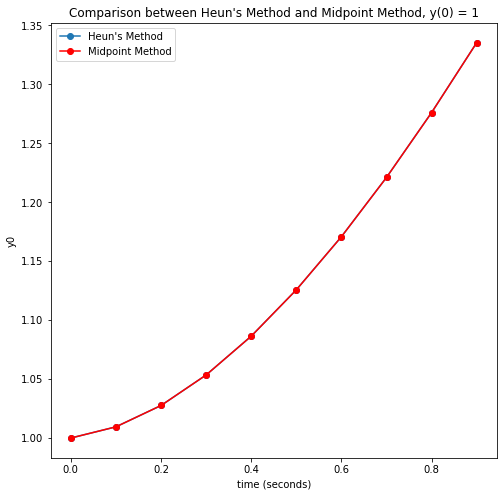

In [2]:
# Coding Problem B

# define midpoint method (taken from test.py)
def midpoint(coeff, y, derivs, theTime):
  ynew = y + coeff.dt*derivs(coeff,y + (0.5 * coeff.dt * derivs(coeff,y,theTime)),theTime)
  return ynew

# define a function for Heun's method
def heun(coeff, y, derivs, theTime):
  k1 = coeff.dt * derivs(coeff,y, theTime)
  k2 = coeff.dt * derivs(coeff,y + (2.0/3.0 * k1),theTime)
  ynew = y + (1.0/4.0) * k1 + (3.0/4.0) * k2
  return ynew

# define derivative function
def derivs(coeff, y, theTime):
  f = coeff.c1*theTime + coeff.c2*y + 1.0
  return f


# initial values, with initial condition y(0) = 1
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.1,'c1':1.,'c2':-1.}
initialVals['comment'] = 'written Oct. 17, 2015'
initialVals['plot_title'] = 'Comparison between Heun\'s Method and Midpoint Method, y(0) = 1'

infile='run_2.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff
#
        
infile='run_2.json'
coeff=read_init(infile)

#
# integrate and save the result in savedata
#
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
y_heun=coeff.yinitial
y_mid=coeff.yinitial
nsteps=len(time) 
savedata_heun=np.empty([nsteps],np.float64)
savedata_midpoint=np.empty([nsteps],np.float64)
for i in range(nsteps):
    theTime = time[i]
    if i == 0:
        savedata_heun[i] = y_heun # input initial condition
        savedata_midpoint[i] = y_mid
    else:
        y_heun=heun(coeff,y_heun,derivs,theTime) # call heun at each timestep
        y_mid=midpoint(coeff,y_mid,derivs,theTime) # call midpoint at each timestep
        savedata_heun[i]=y_heun
        savedata_midpoint[i]=y_mid

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
theAx.plot(time,savedata_heun,'o-',label='Heun\'s Method')
theAx.plot(time,savedata_midpoint,'o-r',label='Midpoint Method')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0')       
theAx.legend(loc='best')

print('savedata_heun - savedata_midpoint:')
print(savedata_heun - savedata_midpoint)
print('Very little difference between Heun\'s method and Midpoint method')
print('Plot shows exponential growth, similar to the curves plotted in the previous section.')

savedata_heun - savedata_midpoint:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 5.55111512e-17
 5.55111512e-17 4.16333634e-17 2.77555756e-17 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Again, very little difference between Heun's method and Midpoint method
Plot shows negative concavity, in contrast to the positive concavity from the previous plots, because of the negative IC.


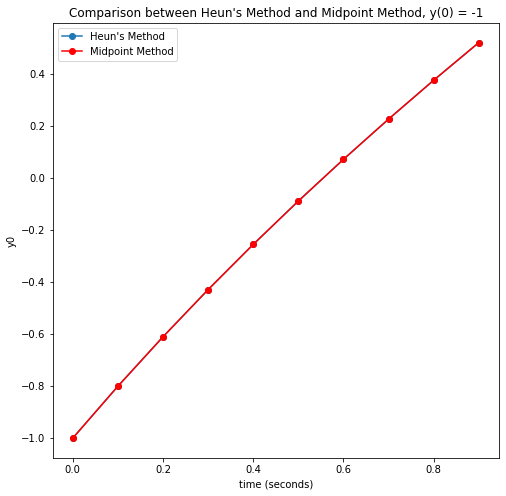

In [3]:
# initial condition, y(0) = -1
initialVals={'yinitial': -1,'t_beg':0.,'t_end':1.,'dt':0.1,'c1':1.,'c2':-1.}
initialVals['comment'] = 'written Oct. 17, 2015'
initialVals['plot_title'] = 'Comparison between Heun\'s Method and Midpoint Method, y(0) = -1'

infile='run_3.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff
#
        
infile='run_3.json'
coeff=read_init(infile)

#
# integrate and save the result in savedata
#
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
y_heun=coeff.yinitial
y_mid=coeff.yinitial
nsteps=len(time) 
savedata_heun=np.empty([nsteps],np.float64)
savedata_midpoint=np.empty([nsteps],np.float64)
for i in range(nsteps):
    theTime = time[i]
    if i == 0:
        savedata_heun[i] = y_heun # input initial condition
        savedata_midpoint[i] = y_mid
    else:
        y_heun=heun(coeff,y_heun,derivs,theTime) # call heun at each timestep
        y_mid=midpoint(coeff,y_mid,derivs,theTime) # call midpoint at each timestep
        savedata_heun[i]=y_heun
        savedata_midpoint[i]=y_mid

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
theAx.plot(time,savedata_heun,'o-',label='Heun\'s Method')
theAx.plot(time,savedata_midpoint,'o-r',label='Midpoint Method')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0')       
theAx.legend(loc='best')

print('savedata_heun - savedata_midpoint:')
print(savedata_heun - savedata_midpoint)
print('Again, very little difference between Heun\'s method and Midpoint method')
print('Plot shows negative concavity, in contrast to the positive concavity from the previous plots, because of the negative IC.')

In [4]:
# There is practically no difference between Heun's method and Midpoint method for both ICs when applied to the test equation.

# Both equations have O(delta_t^2) local truncation error

# Both methods involve a "first guess" with k1, which is then refined by k2, so both are 2-step methods which require the 
# derivative at the initial point

# Although k2 is different for both (+ 2/3k1 for Heun and +1/2k1 for Midpoint), their final weightings for k1 and k2
# bring them back in line with each other, hence it's no surprise that the two methods are so similar.

